In [1]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exploratory Data Analysis (EDA)**

In [13]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/Data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Data"))
file_count = len(files)
#print(file_count)

['Bengin cases', 'Malignant cases']


In [16]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/Data'
base_dir = '/content/drive/MyDrive/Split_data_CNN'
os.mkdir(base_dir)

In [17]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [18]:
#Under train folder create two folders 

train_cloud_dir = os.path.join(train_dir, 'Bengin cases')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'Malignant cases')
os.mkdir(train_foggy_dir)

In [19]:
#Under validation folder create two folders 

validation_cloud_dir = os.path.join(validation_dir, 'Bengin cases')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'Malignant cases')
os.mkdir(validation_foggy_dir)

In [20]:
import os
import random
from shutil import copyfile

In [21]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [22]:
BENGIN_SOURCE_DIR = '/content/drive/MyDrive/Data/Bengin cases/'
TRAINING_BENGIN_DIR = '/content/drive/MyDrive/Split_data_CNN/train/Bengin cases/'
VALID_BENGIN_DIR = '/content/drive/MyDrive/Split_data_CNN/validation/Bengin cases/'

MALIGNANT_SOURCE_DIR = '/content/drive/MyDrive/Data/Malignant cases/'
TRAINING_MALIGNANT_DIR = '/content/drive/MyDrive/Split_data_CNN/train/Malignant cases/'
VALID_MALIGNANT_DIR = '/content/drive/MyDrive/Split_data_CNN/validation/Malignant cases/'

In [23]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, VALID_BENGIN_DIR, split_size)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, VALID_MALIGNANT_DIR, split_size)

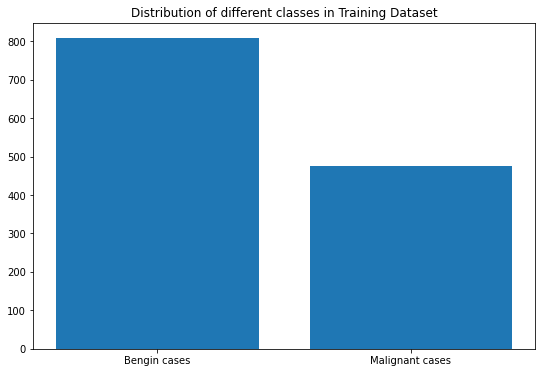

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Split_data_CNN/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [26]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Split_data_CNN/train/'+i+'/'))))

Training Bengin cases images are: 808
Training Malignant cases images are: 476


In [27]:
for i in ['Bengin cases', 'Malignant cases']:
    print('Testing {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Split_data_CNN/validation/'+i+'/'))))

Testing Bengin cases images are: 143
Testing Malignant cases images are: 85


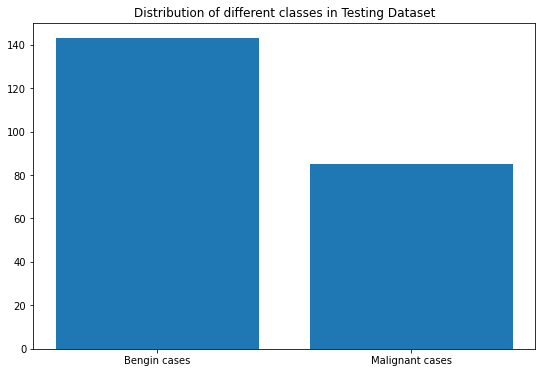

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Bengin cases', 'Malignant cases']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Split_data_CNN/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

In [ ]:
!pip install tensorflow==2.7.0

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import sequential
from tensorflow.keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=8,
                                   zoom_range=0.15,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.10,
                                   horizontal_flip=True,
                                   brightness_range=[0.8,1.2],
                                   channel_shift_range=0.15,
                                   fill_mode="nearest")

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/Split_data_CNN/train',target_size=(224,224),batch_size=32,class_mode='binary')

x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/Split_data_CNN/validation',target_size=(224,224),batch_size=32,class_mode='binary',shuffle =False)

print(x_train.class_indices)
print(x_test.class_indices)

Found 1284 images belonging to 2 classes.
Found 228 images belonging to 2 classes.
{'Bengin cases': 0, 'Malignant cases': 1}
{'Bengin cases': 0, 'Malignant cases': 1}


In [35]:
from keras.layers.convolutional import Convolution2DTranspose
from keras.models import Sequential
from IPython.core import history
from tensorflow.python import metrics

In [36]:

model = Sequential()
model.add(Convolution2D (32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D (pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Convolution2D(64,(3,3),activation='relu'))


model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                    

In [37]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [38]:
TRAIN_COUNT =len(x_train.filepaths)
TEST_COUNT=len(x_test.filepaths)
TRAIN_STEPS_PER_EPOCH= round(TRAIN_COUNT/32)
VAL_STEPS_PER_EPOCH = round(TEST_COUNT/32)

In [39]:
print(f"TRAIN_STEPS_PER_EPOCH:{TRAIN_STEPS_PER_EPOCH}")
print(f"VAL_STEPS_PER_EPOCH:{VAL_STEPS_PER_EPOCH}")

TRAIN_STEPS_PER_EPOCH:40
VAL_STEPS_PER_EPOCH:7


In [40]:
from tensorflow.python.keras.callbacks import EarlyStopping,ModelCheckpoint
EARLY_STOP_PATIENCE =5

In [41]:
cb_early_stopper =EarlyStopping(monitor='val_losss',patience=EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath='FINAL_CNN.hdf5',monitor='val_loss',save_best_only=True,mode='auto')
callbacks=[cb_checkpointer,cb_early_stopper]
history=model.fit_generator(x_train,steps_per_epoch=TRAIN_STEPS_PER_EPOCH,epochs=20,
                            validation_data=x_test,validation_steps=VAL_STEPS_PER_EPOCH)

Epoch 1/20
40/40 [==============================] - 35s 668ms/step - loss: 0.7280 - accuracy: 0.6174 - val_loss: 0.6621 - val_accuracy: 0.6384
Epoch 2/20
40/40 [==============================] - 28s 690ms/step - loss: 0.6426 - accuracy: 0.6286 - val_loss: 0.5535 - val_accuracy: 0.6384
Epoch 3/20
40/40 [==============================] - 25s 636ms/step - loss: 0.5422 - accuracy: 0.6837 - val_loss: 0.2518 - val_accuracy: 0.9018
Epoch 4/20
40/40 [==============================] - 26s 638ms/step - loss: 0.4790 - accuracy: 0.7668 - val_loss: 0.2593 - val_accuracy: 0.9107
Epoch 5/20
40/40 [==============================] - 26s 639ms/step - loss: 0.4236 - accuracy: 0.8011 - val_loss: 0.3208 - val_accuracy: 0.9107
Epoch 6/20
40/40 [==============================] - 26s 640ms/step - loss: 0.4089 - accuracy: 0.8027 - val_loss: 0.3458 - val_accuracy: 0.9018
Epoch 7/20
40/40 [==============================] - 30s 759ms/step - loss: 0.4517 - accuracy: 0.7971 - val_loss: 0.3150 - val_accuracy: 0.8839

In [ ]:
history=model.fit_generator(x_train,steps_per_epoch=24,epochs=30,validation_data=x_test,validation_steps=5)

In [42]:
model.save("FINAL_CNN.hdf5")

In [43]:

keys=history.history.keys()
print(keys)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


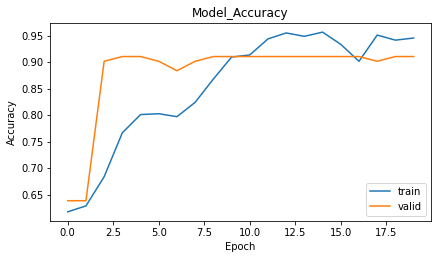

In [44]:
plt.figure(1,figsize=(15,8))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])

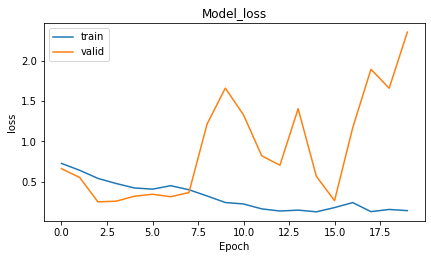

In [45]:
plt.figure(1,figsize=(15,8))
plt.subplot(222)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()

In [46]:

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [47]:
y_pred=model.predict(x_test)

In [48]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay


threshold=0.5
y_pred_threshold=[(1 if val>threshold else 0) for val in y_pred]
y_true=x_test.labels.tolist()
print(confusion_matrix(y_true,y_pred_threshold))

[[123  20]
 [  0  85]]


In [49]:

print(accuracy_score(y_true,y_pred_threshold))

0.9122807017543859


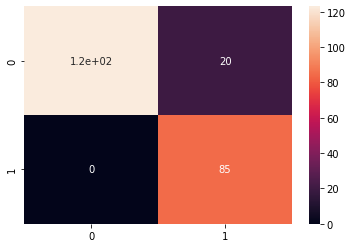

In [50]:

sns.heatmap(confusion_matrix(y_true,y_pred_threshold),annot=True)

In [51]:

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
model=load_model('/content/FINAL_CNN.hdf5')

In [52]:
from keras.preprocessing import image
import cv2
import numpy as np
import PIL
from PIL import Image

In [188]:

img=image.load_img('/content/drive/MyDrive/Split_data_CNN/train/Malignant cases/Malignant case (117).jpg',
                   color_mode='rgb',target_size=(224,224))

In [189]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [190]:
pred=model.predict(x)
pred

array([[1.]], dtype=float32)

In [191]:
class_names=["Bengin_case","Malignant_case",]
prediction=class_names[int(pred[0][0])]
print(pred[0][0])
print(prediction)

1.0
Malignant_case
